<a href="https://colab.research.google.com/github/ScottErnst0331/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [57]:
# Mean
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean = sum(sales) / len(sales)
mean

3052.714285714286

In [58]:
# Variance Step 1 (sales is a population)
# Create numerator components using list comprehension

numerator_components = [(value - mean) ** 2 for value in sales]
numerator_components


[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [62]:
# Variance Step 2
# Calculate numerator

numerator = sum(numerator_components)
numerator


1286327.4285714284

In [59]:
# Variance Step 3
# Final calculation

variance = numerator / len(sales)
variance


183761.06122448976

In [60]:
# Check my variance with NumPy

import numpy as np
check_variance = np.var(sales)
check_variance


183761.06122448976

In [63]:
# Standard Deviation (square root of the variance)

sales_standard_deviaton = variance ** 0.5
sales_standard_deviaton


428.67360686714756

In [67]:
# Check my standard deviation with NumPy

check_sales_standard_deviation = np.std(sales)
check_sales_standard_deviation


428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# Create list of customers data

customers = [127, 80, 105, 92, 120, 115, 93]


In [61]:
# Calculate covariance

covariance = np.cov(sales, customers, ddof=0)
covariance


array([[183761.06122449,   6518.02040816],
       [  6518.02040816,    249.3877551 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [64]:
# Calculate standard deviation of customers

customers_standard_deviation = np.std(customers)
customers_standard_deviation


15.792015549069118

In [75]:
# Calculate correlation coefficient

cc_sales_and_customers = np.corrcoef(sales, customers)
cc_sales_and_customers


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
titanic_dataset = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')


In [65]:
# Check head for column headers

titanic_dataset.head()


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [70]:
# Create new dataset with only numerical values

numeric_titanic_dataset = titanic_dataset[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']]
numeric_titanic_dataset.head()


,pclass,survived,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [68]:
# Check for NaN values

numeric_titanic_dataset.isnull().sum()


pclass      1
survived    1
age         0
sibsp       1
parch       1
fare        2
dtype: int64

In [69]:
# Check datatypes

numeric_titanic_dataset.dtypes


pclass      float64
survived    float64
age         float64
sibsp       float64
parch       float64
fare        float64
dtype: object

In [73]:
# Calculate Titanic covariance

titanic_covariance = np.cov(numeric_titanic_dataset, ddof=0)
titanic_covariance


array([[5953.1047092 , 4282.79467052, 4287.30321181, ...,  134.90186632,
         149.62469618,           nan],
       [4282.79467052, 3140.43598401, 3140.07046708, ...,   24.29166646,
          29.42385104,           nan],
       [4287.30321181, 3140.07046708, 3140.06701389, ...,   29.08038194,
          34.56753472,           nan],
       ...,
       [ 134.90186632,   24.29166646,   29.08038194, ...,   93.20842014,
         100.25095486,           nan],
       [ 149.62469618,   29.42385104,   34.56753472, ...,  100.25095486,
         107.83550347,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

In [74]:
# Calculate Titanic correlation coefficient

cc_titanic = np.corrcoef(numeric_titanic_dataset)
cc_titanic


array([[1.        , 0.99051378, 0.99161475, ..., 0.18110007, 0.18674571,
               nan],
       [0.99051378, 1.        , 0.99994235, ..., 0.0448988 , 0.05056193,
               nan],
       [0.99161475, 0.99994235, 1.        , ..., 0.05375305, 0.05940432,
               nan],
       ...,
       [0.18110007, 0.0448988 , 0.05375305, ..., 1.        , 0.99995409,
               nan],
       [0.18674571, 0.05056193, 0.05940432, ..., 0.99995409, 1.        ,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

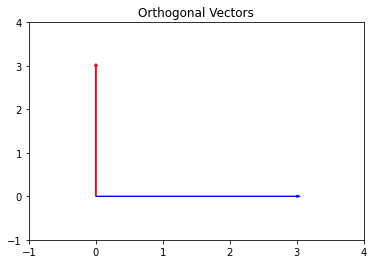

In [76]:
# Plot two orthogonal vectors
# Orthogonal means perpendicular

import matplotlib.pyplot as plt

vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

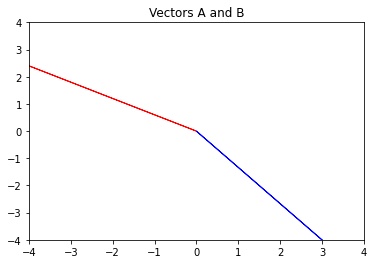

In [72]:
# Plot the vectors

vector_a = [-5, 3, 7]
vector_b = [6, -8, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_a[0], vector_a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_b[0], vector_b[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-4,4)          
plt.ylim(-4,4)
plt.title("Vectors A and B")
plt.show()


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# Create Vector C

vector_c = np.array([2, -15, 6, 20])


In [82]:
# Calculate the squared norm of Vector C 

vector_c_norm_squared = np.linalg.norm(vector_c) ** 2
vector_c_norm_squared

665.0

In [85]:
# Find the squared dot product of Vector C

vector_c_dot_product_squared = np.dot(vector_c, vector_c) ** 2
vector_c_dot_product_squared

442225

In [90]:
# Product of Transposed Vector C times Vector C

transposed_vector_c = np.transpose(vector_c)
product = transposed_vector_c * vector_c
product

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

### Need more time to study this question

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [92]:
# Create Vector F

vector_f = np.array([4, 12, 11, 9, 2])
vector_f

array([ 4, 12, 11,  9,  2])

In [93]:
# Calculate norm of Vector F

vector_f_norm = np.linalg.norm(vector_f)
vector_f_norm

19.131126469708992

In [95]:
# Calculate unit vector (F "hat")

f_hat = vector_f / np.linalg.norm(vector_f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# STRETCH GOAL
# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

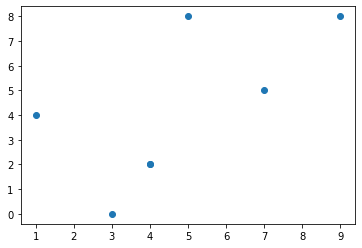

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()